# Import Libraries

In [1]:
# Cell 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    precision_recall_curve, roc_curve, auc
)

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

from tensorflow import keras
from tensorflow.keras import layers

import joblib
import os
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest

# Load Dataset

In [2]:
# Cell 2: Load the ULB credit card dataset
df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Dataset Summary

In [3]:
# Cell 3: Dataset summary
print(df.shape)
print(df['Class'].value_counts())
df.describe()


(284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# EDA: Class Distribution

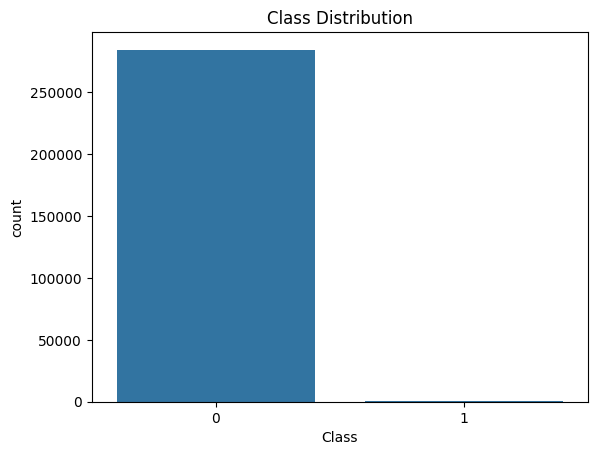

In [5]:
# Cell 5: Class imbalance visualization
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()


# EDA: Amount Distribution

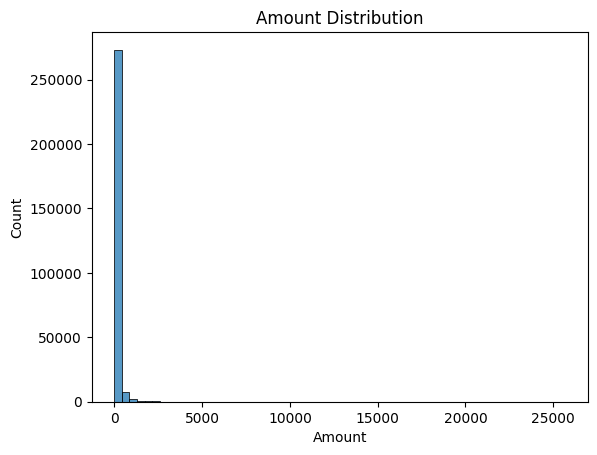

In [6]:
sns.histplot(df['Amount'], bins=60)
plt.title("Amount Distribution")
plt.show()


#EDA: Correlation Matrix

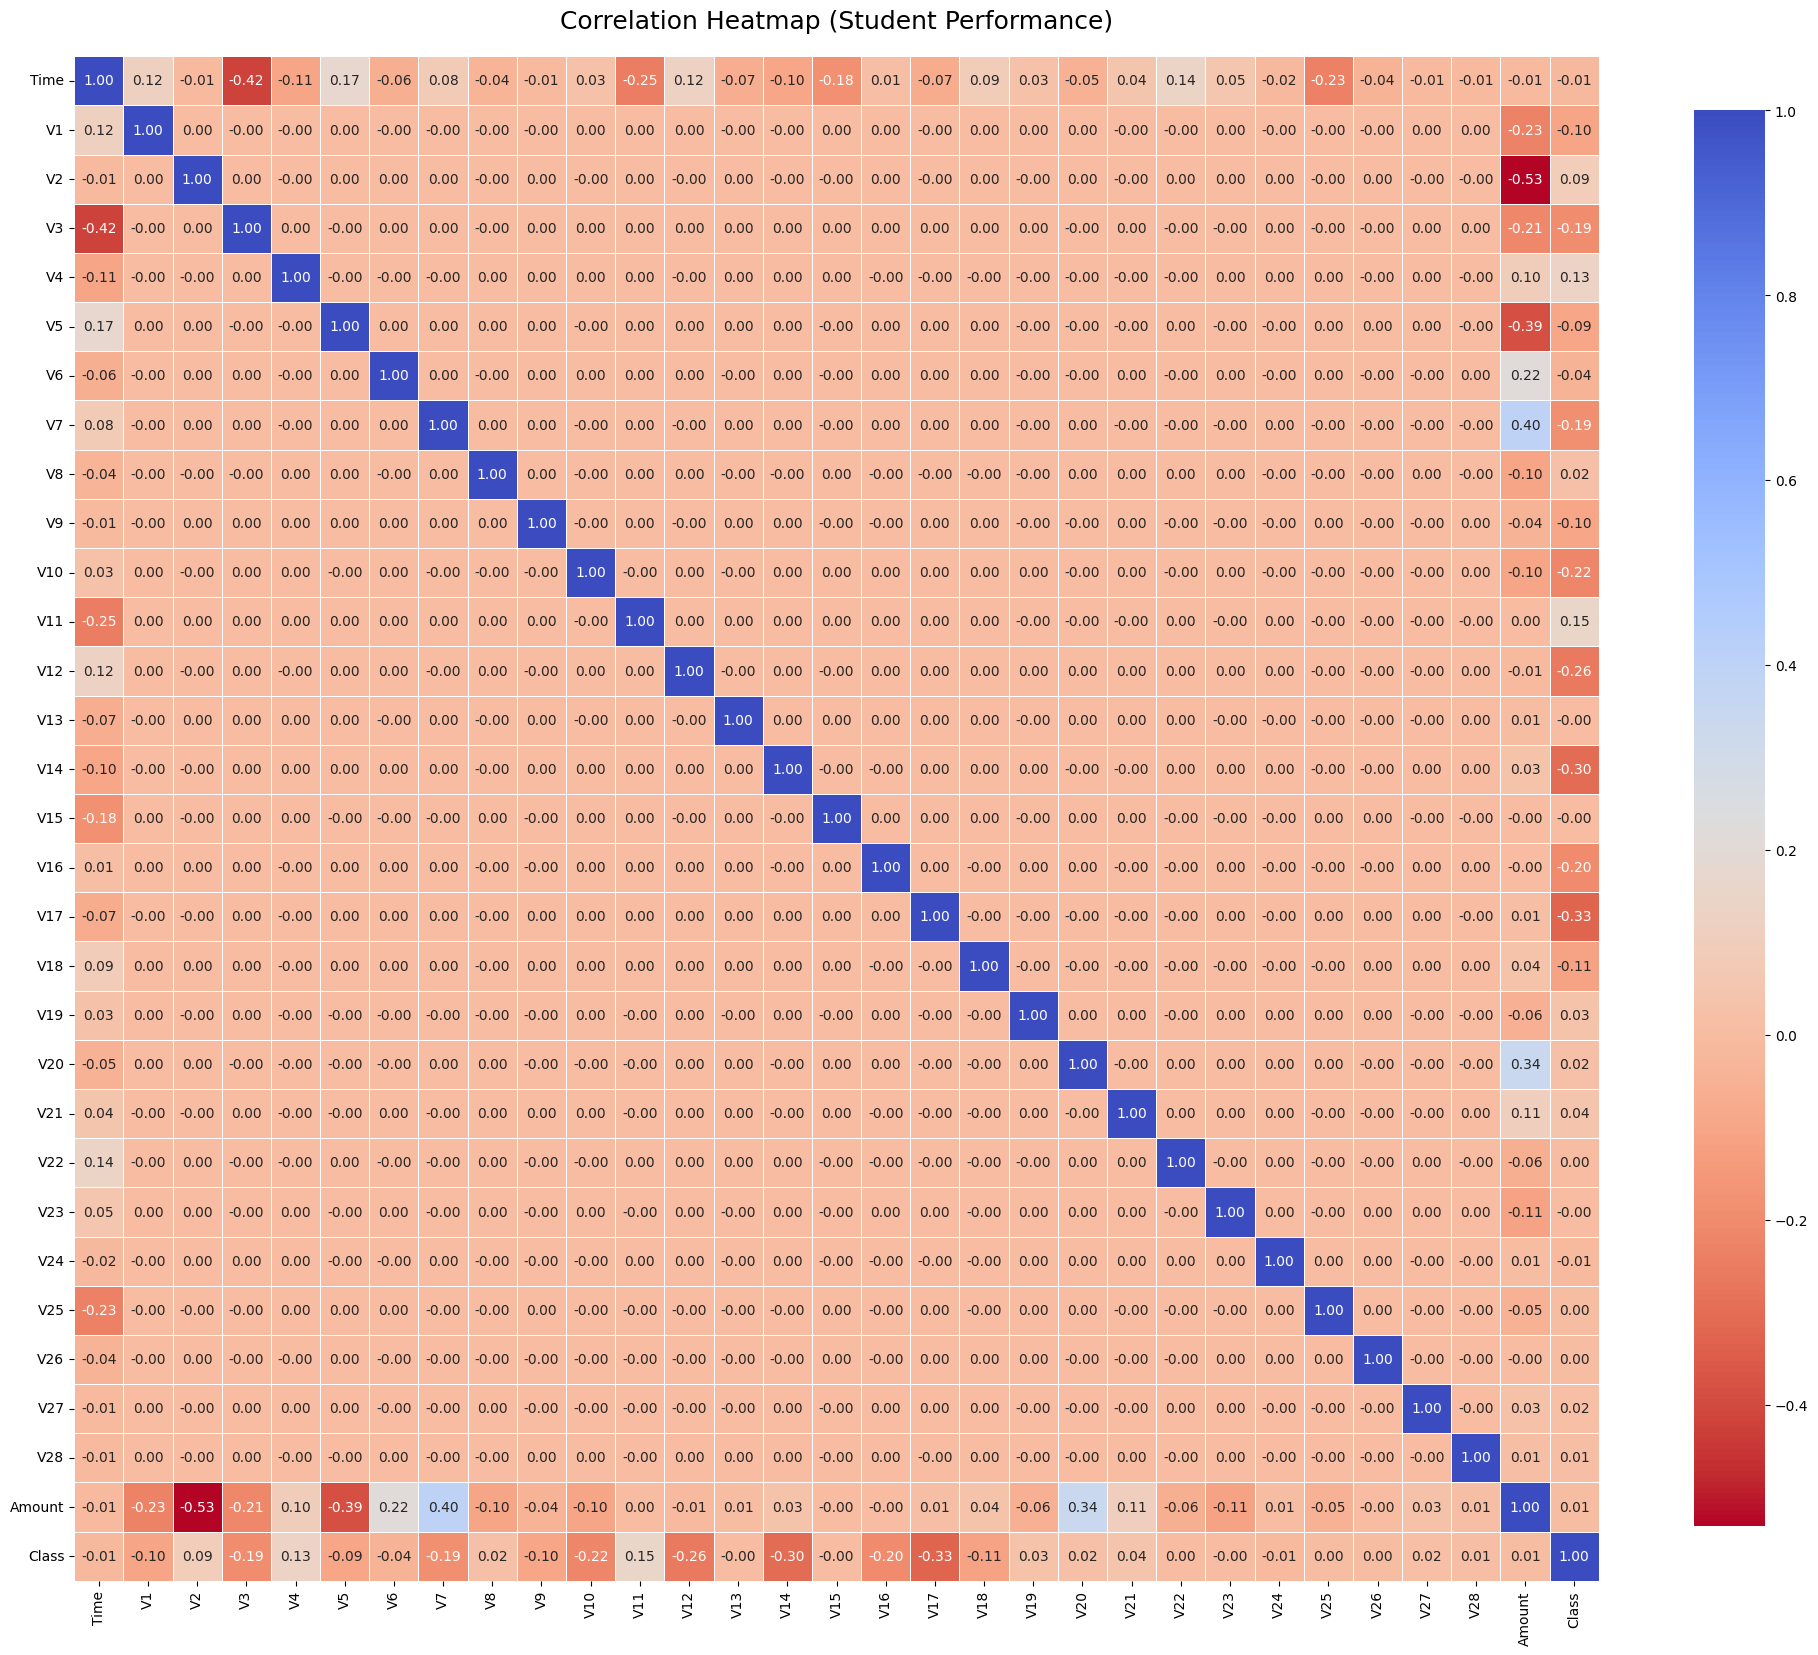

In [7]:
plt.figure(figsize=(20,18))

corr = df.corr()

sns.heatmap(
    corr,
    cmap='coolwarm_r',
    annot=True,          # show correlation values
    fmt=".2f",           # round to 2 decimals
    square=True,         # square cells like your image
    linewidths=0.5,      # add grid lines
    cbar_kws={'shrink': 0.8}  # smaller colorbar
)

plt.title("Correlation Heatmap (Student Performance)", fontsize=18, pad=20)
plt.tight_layout()
plt.show()


# Data Preprocessing

In [8]:
# Cell 8: Preprocessing
df2 = df.copy()

scaler = StandardScaler()
df2['Amount'] = scaler.fit_transform(df2['Amount'].values.reshape(-1,1))
df2['Time'] = scaler.fit_transform(df2['Time'].values.reshape(-1,1))

X = df2.drop('Class', axis=1)
y = df2['Class']


# Train/Test Split

In [9]:
# Cell 9: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((227845, 30), (56962, 30))

# Prepare Normal-Only Training Data (For Unsupervised Models)

In [10]:
# Cell 10: Use only normal transactions for training anomaly models
X_train_normal = X_train[y_train == 0]
X_test_full = X_test
y_test_full = y_test.values


# Isolation Forest

In [11]:
# Cell 11: Isolation Forest model
iso = IsolationForest(
    n_estimators=200,
    contamination=df['Class'].mean(),
    random_state=42
)

iso.fit(X_train_normal)

# anomaly score: higher means more anomalous
iso_scores = -iso.decision_function(X_test_full)


# Local Outlier Factor (LOF)

In [12]:
# Scale data
scaler = StandardScaler()
X_train_sample = X_train_normal.sample(n=50000, random_state=42)   # 50k sample
X_train_sample_scaled = scaler.fit_transform(X_train_sample)
X_test_scaled = scaler.transform(X_test_full)

# Fast LOF model
lof = LocalOutlierFactor(
    n_neighbors=5,
    novelty=True
)

# Fit LOF on sampled & scaled data
lof.fit(X_train_sample_scaled)

# Compute anomaly scores
lof_scores = -lof.decision_function(X_test_scaled)

# Autoencoder Model

In [13]:
# Cell 13: Autoencoder architecture
input_dim = X_train_normal.shape[1]

input_layer = keras.Input(shape=(input_dim,))
encoded = layers.Dense(16, activation='relu')(input_layer)
encoded = layers.Dense(8, activation='relu')(encoded)

decoded = layers.Dense(16, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='linear')(decoded)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,286 (5.02 KB)

 Trainable params: 1,286 (5.02 KB)

 Non-trainable params: 0 (0.00 B)

# Train Autoencoder

In [14]:
# Cell 14: Training the autoencoder
history = autoencoder.fit(
    X_train_normal, X_train_normal,
    epochs=20,
    batch_size=256,
    validation_split=0.1,
    verbose=1
)


Epoch 1/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.8567 - val_loss: 0.4849
Epoch 2/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4642 - val_loss: 0.4070
Epoch 3/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4041 - val_loss: 0.3784
Epoch 4/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3799 - val_loss: 0.3641
Epoch 5/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3704 - val_loss: 0.3570
Epoch 6/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3586 - val_loss: 0.3545
Epoch 7/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3556 - val_loss: 0.3668
Epoch 8/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3580 - val_loss: 0.3463
Epoch 9/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3642 - val_loss: 0.3428
Epoch 10/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3459 - val_loss: 0.3407
Epoch 11/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3456 - val_loss: 0.3377
Epoch 12/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

# Autoencoder Reconstruction Error

In [15]:
# Cell 15: Compute reconstruction error
recon = autoencoder.predict(X_test_full)
mse = np.mean(np.power(X_test_full - recon, 2), axis=1)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


# Function to Compute Metrics

In [16]:
# Cell 16: Evaluation function
def evaluate_scores(name, y_true, scores):
    precision, recall, thresholds = precision_recall_curve(y_true, scores)
    f1 = 2 * (precision * recall) / (precision + recall + 1e-12)

    best_idx = np.argmax(f1)
    best_thresh = thresholds[max(best_idx, 0)]

    preds = (scores >= best_thresh).astype(int)

    roc = roc_auc_score(y_true, scores)
    cm = confusion_matrix(y_true, preds)

    print(f"\n==== {name} ====")
    print("ROC AUC:", roc)
    print(classification_report(y_true, preds))
    print(cm)

    return roc


# Evaluate All Models

In [17]:
roc_iso = evaluate_scores("Isolation Forest", y_test_full, iso_scores)
roc_lof = evaluate_scores("Local Outlier Factor", y_test_full, lof_scores)
roc_ae  = evaluate_scores("Autoencoder", y_test_full, mse)



==== Isolation Forest ====
ROC AUC: 0.9530713453079599
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.19      0.35      0.24        98

    accuracy                           1.00     56962
   macro avg       0.59      0.67      0.62     56962
weighted avg       1.00      1.00      1.00     56962

[[56718   146]
 [   64    34]]

==== Local Outlier Factor ====
ROC AUC: 0.767966067265398
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.03      0.27      0.05        98

    accuracy                           0.98     56962
   macro avg       0.51      0.62      0.52     56962
weighted avg       1.00      0.98      0.99     56962

[[55931   933]
 [   72    26]]

==== Autoencoder ====
ROC AUC: 0.9707047175932838
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
         

# Hyperparameter Tuning (Isolation Forest Example)

In [18]:
#  Cell 18: Hyperparameter tuning for Isolation Forest
# Scale data (faster IsolationForest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_normal)
X_val_scaled   = scaler.transform(X_test_full)
# Use a 40k sample for very fast grid search
X_train_sample = X_train_scaled[:40000]
# Custom scoring for unsupervised AUC
def iso_auc_scorer(estimator, X):
    scores = -estimator.decision_function(X_val_scaled)
    return roc_auc_score(y_test_full, scores)

custom_scorer = make_scorer(iso_auc_scorer, greater_is_better=True)

# Faster parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_samples': [0.5, 0.8],
    'contamination': [0.001, 0.005]
}

iso_base = IsolationForest(
    random_state=42,
    warm_start=True
)

grid = GridSearchCV(
    iso_base,
    param_grid=param_grid,
    scoring=custom_scorer,
    cv=2,
    n_jobs=-1,
    verbose=0
)

grid.fit(X_train_sample)

print("Best parameters:", grid.best_params_)


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters: {'contamination': 0.001, 'max_samples': 0.5, 'n_estimators': 100}


# Final Comparison Table

In [19]:
# Cell 19: Model comparison
results = pd.DataFrame({
    "Model": ["Isolation Forest", "LOF", "Autoencoder"],
    "ROC-AUC": [roc_iso, roc_lof, roc_ae]
})

results


,Model,ROC-AUC
0,Isolation Forest,0.953071
1,LOF,0.767966
2,Autoencoder,0.970705
